In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Neural Net libraries. 
# I installed the live version of lasagne, theano, and nolearn directly from git. Follow this instructions here:
# https://github.com/dnouri/nolearn
from lasagne import layers
from lasagne import nonlinearities
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

# Function to print all pandas rows
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', len(x.columns))
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv("/Users/cjllop/Code/MIDS/MLearning/Final/Data/train.csv")
test = pd.read_csv("/Users/cjllop/Code/MIDS/MLearning/Final/Data/test.csv")


In [ ]:
# Big Picture of Data
print "Train Data:"
print data.shape
print data.columns.values
print "Test Data:"
print test.shape
print test.columns.values


In [ ]:
# Extract new features here because it's easier in Pandas than NumPy
def build_features(data):
    data['DateTime'] = pd.to_datetime(data['Dates'])
    date_vector = data['DateTime'].dt.date
    data['DateDiff'] = (date_vector - date_vector.min()) / np.timedelta64(1, 'D')
    data['Year'] = pd.DatetimeIndex(data['DateTime']).year
    data['Month'] = pd.DatetimeIndex(data['DateTime']).month
    data['Day'] = pd.DatetimeIndex(data['DateTime']).day
    data['Hour'] = pd.DatetimeIndex(data['DateTime']).hour
    data['SecondsDelta'] = (data.DateTime - pd.Timestamp('2013-01-01')) / np.timedelta64(1,'s')
    data['Weekend'] = (data.DayOfWeek == "Saturday") | (data.DayOfWeek == "Sunday")
    data['XR'] = data['X'].round(decimals=3).apply(str)
    data['YR'] = data['Y'].round(decimals=3).apply(str)
    data['XR4'] = data['X'].round(decimals=4).apply(str)
    data['YR4'] = data['Y'].round(decimals=4).apply(str)
    years = pd.get_dummies(data.Year)
    years.columns = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    months = pd.get_dummies(data.Month)
    months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    days = pd.get_dummies(data.Day)
    days.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
    daysofweek = pd.get_dummies(data.DayOfWeek)
    hours = pd.get_dummies(data.Hour)
    hours.columns = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM',
                     '6AM', '7AM', '8AM', '9AM', '10AM', '11AM',
                     '12PM', '1PM', '2PM', '3PM', '4PM', '5PM',
                     '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']
    districts = pd.get_dummies(data.PdDistrict)
    new_data = pd.concat([data, years, months, days, daysofweek, hours, districts], axis=1)
    return new_data

data = build_features(data)
data_XRs = pd.get_dummies(data.XR)
data_YRs = pd.get_dummies(data.YR)    
data_XR4s = pd.get_dummies(data.XR4)
data_YR4s = pd.get_dummies(data.YR4)    
test = build_features(test)
test_XRs = pd.get_dummies(test.XR)
test_YRs = pd.get_dummies(test.YR)    
test_XR4s = pd.get_dummies(test.XR4)
test_YR4s = pd.get_dummies(test.YR4)    

#print data.columns.values
print test_XR4s.columns.values
print test_YR4s.columns.values


In [ ]:
# Separate labels
train_labels = data.Category

# Create integer labels
panda_labels = pd.Categorical(data.Category).codes
train_labels_int = np.array(panda_labels).astype(np.int32)

# Drop Category, Descript and Resolution columns since we cannot use them to predict. Drop non-numerics too for NN.
train_data = data.drop(['Category', 'Descript', 'Resolution', 'DateTime', 'Dates', 'PdDistrict', 'Address', 'DayOfWeek'], axis=1)
train_data.Weekend = train_data.Weekend * 1
train_names = train_data.columns.values.tolist()

test_data = test.drop(['DateTime', 'Dates', 'PdDistrict', 'Address', 'DayOfWeek'], axis=1)
test_data.Weekend = test_data.Weekend * 1
test_names = test_data.columns.values.tolist()


#print_full(train_data.head(5))
print_full(test_data.head(5))

#print_full(pd.DataFrame(train_data.dtypes))

In [5]:
#TODO 
#data_address_dummies = pd.get_dummies(data.Address,sparse=True)
#test_address_dummies = pd.get_dummies(test.Address,sparse=True

In [ ]:
#TODO 
#print pd.concat([data, pd.get_dummies(data.PdDistrict, prefix="PdDistrict")], axis=1)
# Let's create dummy variables for any address with over 100 events.
address_counts = data["Address"].value_counts()
address_list = pd.Series(address_counts[address_counts > 100].index).to_frame("Address")
#print len(address_counts)
#print len(address_counts[address_counts > 100])
#address_list.columns.values = ["Address"]
#print pd.DataFrame(address_list).columns.values
#print data.columns.values
#print address_list
top_address = pd.merge(data, address_list, how='inner', on=['Address'])
#top_address['temp'] = 1
#bottom_address = pd.merge(data, top_address, how='left', on=['Address'])
print data.shape
print result.shape
#print bottom_address.shape

#address_counts[address_counts > 100].index.values



In [36]:
# Lasagne works off of Theano instead of Numpy
#print data.Category
#train_data = np.array(data[['X','Y','Year','Month','Day','Hour','DayOfYear']].values)
#train_data = np.array(data_features)

#panda_labels = pd.Categorical(data.Category).labels
#train_labels = np.array(panda_labels).astype(np.int32)
#print train_labels
#print train_data.groupby(level=0).first()
#print train_data.index.get_duplicates()
#print train_data.shape



In [6]:
# Create random dev sample so we can see how that accuracy compares to our Kaggle results
# np.random.seed(100)

# Pick 10% of rows for dev
# rows = np.random.choice(data.index, size = len(data) / 10, replace = False)

# dev = data.ix[rows]
# train = data.drop(rows)

# print train.shape
# print dev.shape
# print test.shape


(790245, 10)
(87804, 10)
(884262, 8)


features = [
 'X', 'Y', 'DateDiff', 'Year', 'Month', 'Day', 'Hour',
 'SecondsDelta', 'Weekend', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
 '2010', '2011', '2012', '2013', '2014', '2015', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '1', '2', '3', '4', '5', '6', '7', '8',
 '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
 '24', '25', '26', '27', '28', '29', '30', '31', 'Friday', 'Monday', 'Saturday',
 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM',
 '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM',
 '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL',
 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL',
 'TENDERLOIN']

In [ ]:
# Convert to numpy
#features = ['X', 'Y'] #???? | ???? | 2.69680 | 0.1871
#features = ['X', 'Y', 'DateDiff'] #2.73877 | 2.69913 | 2.69680 | 0.199
#features = ['X', 'Y', 'DateDiff', 'Year', 'Month', 'Day', 'Hour', 'Weekend'] #2.73866 | 2.69914 || 0.199
#features = ['X', 'Y', 'Year', 'Month', 'Day', 'Hour', 'Weekend'] #2.73870
#features = ['Year', 'Month', 'Day', 'Hour', 'Weekend'] #2.73867
#features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',] # 2.70496
#2.64560 | 2.62009 | 0.174%
#features = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
#2.71693|||0.20055
#[(200,10) = 0.231704608741]
#[(500,20) = 0.240513912094]
#features = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Jan', 'Feb', 'Mar', 'Apr', 'May',  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',  '24', '25', '26', '27', '28', '29', '30', '31', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM',  '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
#features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
features = ['Jan','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']


#np_train_data = np.array(train_data[features])
#np_train_data = np.array(pd.concat([data_XRs, data_YRs], axis=1))
#np_train_data = np.array(pd.concat([train_data[features], data_XRs, data_YRs], axis=1))
# Need to drop any "test" coordinate features that are not in "train". We accept this as a limitation.
#np_test_data = np.array(pd.concat([test_data[features], test_XRs[list(data_XRs)], test_YRs[list(data_YRs)]], axis=1))

#np_train_data = np.array(pd.concat([train_data[features], (data.Year < 2006) * 1, (data.Year < 2008) * 1, (data.Year < 2010) * 1, data_XRs, data_YRs], axis=1))
np_train_data = np.array(pd.concat([train_data[features], (data.Year < 2006) * 1, (data.Year < 2008) * 1, (data.Year < 2010) * 1, data_XR4s, data_YR4s], axis=1))


print np_train_data.shape
print np_test_data.shape

In [206]:
# features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
# The accuracy is: 0.283077595897
# Should run again stopping early @ 77 for better results
num_features = np_train_data.shape[1]

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 300)
(878049,)
# Neural Network with 170039 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      300
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.62524       2.62010      1.00196      0.22793  31.09s
      2       2.51991       2.59395      0.97146      0.23027  31.75s
      3       2.49565       2.58080      0.96701      0.23249  30.31s
      4       2.48162       2.57397      0.96412      0.23394  30.69s
      5       2.47219       2.57061      0.96171      0.23578  29.10s
      6       2.46487       2.56895      0.95949      0.23725  29.60s
      7       2.45866       2.56775      0.95752      0.23915  30.70s
      8       2.45311       2.56674      0.95573      0.24057  30.76s
      9       2.44801       2.56581      0.95409      0.24198  29.63s
     10       2.44327       2.56441

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 300),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x120c6ae18>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x132c39488>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec

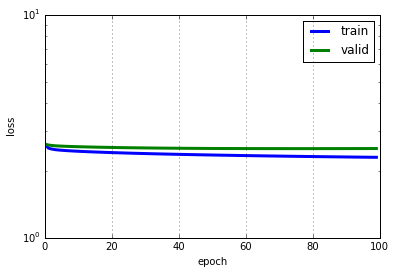

In [121]:
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-0, 1e1)
plt.yscale("log")
plt.show()


In [122]:
train_pred = net1.predict(np_train_data)
print(classification_report(train_labels_int, train_pred))
print 'The accuracy is:', accuracy_score(train_labels_int, train_pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1513
          1       0.20      0.17      0.18     76876
          2       0.00      0.00      0.00       406
          3       0.00      0.00      0.00       289
          4       0.23      0.03      0.06     36755
          5       0.29      0.01      0.02      4320
          6       0.00      0.00      0.00      2268
          7       0.29      0.47      0.36     53971
          8       0.00      0.00      0.00      4280
          9       0.00      0.00      0.00      1166
         10       0.00      0.00      0.00       256
         11       0.00      0.00      0.00       491
         12       0.17      0.02      0.03     10609
         13       0.18      0.01      0.01     16679
         14       0.00      0.00      0.00       146
         15       0.00      0.00      0.00      2341
         16       0.35      0.62      0.45    174900
         17       0.00      0.00      0.00   

In [126]:
net1.predict_proba(np_train_data[0:1])

array([[  8.55994418e-04,   5.17634613e-02,   1.74867594e-04,
          1.33202890e-04,   1.95734782e-02,   1.48921483e-03,
          2.95200712e-03,   8.88459121e-02,   2.66789847e-03,
          2.48293490e-04,   1.30072717e-04,   1.88927414e-04,
          2.79727962e-03,   7.35410847e-03,   6.48898703e-05,
          2.56725077e-03,   2.02256635e-01,   6.92622132e-04,
          1.38507262e-04,   1.23984205e-02,   5.58353028e-02,
          2.10798437e-01,   2.36708894e-05,   4.52529063e-04,
          5.43224795e-04,   2.43055222e-02,   3.40691417e-03,
          6.43635260e-03,   3.93389992e-03,   1.11870311e-04,
          3.93402599e-03,   4.21033642e-04,   1.01596370e-02,
          9.44550728e-06,   1.65134827e-03,   2.66063659e-02,
          1.82371662e-01,   6.57369348e-02,   5.96877890e-03]])

In [151]:
# Tried a more complicated net with layers... still doing the same thing.
net2 = NeuralNet(
    layers=[  # more layers
        ('input', layers.InputLayer),
        ('dense0', layers.DenseLayer),
        ('dropout', layers.DropoutLayer),
        ('dense1', layers.DenseLayer),
        ('output', layers.DenseLayer)
    ],
    # layer parameters:
    input_shape=(None, 7),  # 3 input pixels per batch
    dense0_num_units=10,  # number of units in hidden layer
    dropout_p=0.5,  # Not sure what this does.....
    dense1_num_units=10,  # number of units in hidden layer
    output_num_units=39,  # 39 target values
    output_nonlinearity=nonlinearities.softmax,

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.02,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=10,  # we want to train this many epochs
    verbose=1,
    )

net2.fit(train_data, train_labels)

# Neural Network with 619 learnable parameters

## Layer information

  #  name       size
---  -------  ------
  0  input         7
  1  dense0       10
  2  dropout      10
  3  dense1       10
  4  output       39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       4.14217       2.70658      1.53041      0.19904  2.46s
      2       2.64476       2.70492      0.97776      0.19904  2.82s
      3       2.64386       2.70447      0.97759      0.19904  2.76s
      4       2.64356       2.70428      0.97755      0.19904  2.82s
      5       2.64343       2.70418      0.97753      0.19904  2.74s
      6       2.64335       2.70412      0.97753      0.19904  2.90s
      7       2.64330       2.70408      0.97752      0.19904  2.99s
      8       2.64327       2.70406      0.97752      0.19904  2.91s
      9       2.64324       2.70404      0.97752      0.19904  2.77s
     10       2.64323    

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c727450>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c7273d0>,
     custom_score=None, dense0_num_units=10, dense1_num_units=10,
     dropout_p=0.5, input_shape=(None, 7),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x10c72a938>,
     objective_loss_function=<function categorical_crossentropy at 0x10c645a28>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x1290f2d40>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x1290f2d88>],
     outp

In [180]:
def create_submission(preds):
    labels = ["Id",
                "ARSON",
                "ASSAULT",
                "BAD CHECKS",
                "BRIBERY",
                "BURGLARY",
                "DISORDERLY CONDUCT",
                "DRIVING UNDER THE INFLUENCE",
                "DRUG/NARCOTIC",
                "DRUNKENNESS",
                "EMBEZZLEMENT",
                "EXTORTION",
                "FAMILY OFFENSES",
                "FORGERY/COUNTERFEITING",
                "FRAUD",
                "GAMBLING",
                "KIDNAPPING",
                "LARCENY/THEFT",
                "LIQUOR LAWS",
                "LOITERING",
                "MISSING PERSON",
                "NON-CRIMINAL",
                "OTHER OFFENSES",
                "PORNOGRAPHY/OBSCENE MAT",
                "PROSTITUTION",
                "RECOVERED VEHICLE",
                "ROBBERY",
                "RUNAWAY",
                "SECONDARY CODES",
                "SEX OFFENSES FORCIBLE",
                "SEX OFFENSES NON FORCIBLE",
                "STOLEN PROPERTY",
                "SUICIDE",
                "SUSPICIOUS OCC",
                "TREA",
                "TRESPASS",
                "VANDALISM",
                "VEHICLE THEFT",
                "WARRANTS",
                "WEAPON LAWS"
              ]
    head_str = ','.join(labels)

    num_cats = len(labels)
    
    # Make a dummy row to append to
    #ids = np.arange(preds.shape[0])[np.newaxis].transpose()
    
    #results = np.column_stack((ids, preds))

    # Write results to csv
    str_fmt = "%d"
    for i in range(0,39):
        str_fmt += ",%f"
    np.savetxt('Sample_NN.csv', results, fmt=str_fmt, delimiter=',', header=head_str, comments='')

    #return results

In [177]:
# Now that we've done this, let's run the KNN on the full train, apply to the test, then format.
#KNNmodel = KNeighborsClassifier(n_neighbors=1)
#KNNmodel.fit(full_data, full_labels)
#dev_predict = KNNmodel.predict_proba(test_data).astype(int)

print np_train_data.shape
print np_test_data.shape
test_proba = net1.predict_proba(np_test_data)


(878049, 295)
(884262, 295)


In [181]:
results = create_submission(test_proba)

In [165]:
print results.shape
#print results[0:2]
print str_fmt
print len(str_fmt)/3


(884262, 40)
%d %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f %f
40


____
____
____

Old code below here
____
____
____


In [109]:
np_train_data = np.array(pd.concat([data_XRs, data_YRs], axis=1))
num_features = np_train_data.shape[1]
#The accuracy is: 0.26692018327

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 254)
(878049,)
# Neural Network with 147039 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      254
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.67321       2.66736      1.00219      0.20197  24.90s
      2       2.56639       2.64605      0.96990      0.20978  24.59s
      3       2.54176       2.63234      0.96559      0.21508  24.00s
      4       2.52726       2.62335      0.96337      0.21664  24.68s
      5       2.51784       2.61697      0.96212      0.21816  24.39s
      6       2.51080       2.61196      0.96127      0.22045  23.91s
      7       2.50493       2.60775      0.96057      0.22372  23.92s
      8       2.49969       2.60389      0.95998      0.22694  23.90s
      9       2.49486       2.60038      0.95942      0.22709  24.10s
     10       2.49034       2.59712

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 254),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x112c910e0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x113a6a950>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec

In [120]:
# features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
# The accuracy is: 0.283077595897
# Should run again stopping early @ 77 for better results
num_features = np_train_data.shape[1]

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 295)
(878049,)
# Neural Network with 167539 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      295
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.63132       2.62853      1.00106      0.22558  29.17s
      2       2.52393       2.60553      0.96868      0.22639  28.61s
      3       2.49870       2.59233      0.96388      0.22789  31.51s
      4       2.48395       2.58444      0.96112      0.22916  26.67s
      5       2.47430       2.57896      0.95942      0.23070  27.25s
      6       2.46697       2.57455      0.95822      0.23279  28.06s
      7       2.46080       2.57073      0.95724      0.23409  27.99s
      8       2.45531       2.56732      0.95637      0.23547  27.81s
      9       2.45030       2.56427      0.95556      0.23653  27.60s
     10       2.44568       2.56148

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 295),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x114963878>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x114aeb710>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec

(878049, 296)
(884262, 308)


In [193]:
# features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
# np_train_data = np.array(pd.concat([train_data[features], (data.Year < 2008) * 1, data_XRs, data_YRs], axis=1))

num_features = np_train_data.shape[1]

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 296)
(878049,)
# Neural Network with 168039 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      296
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.62875       2.62633      1.00092      0.22510  29.49s
      2       2.52224       2.60240      0.96920      0.22908  29.07s
      3       2.49736       2.58764      0.96511      0.23085  30.53s
      4       2.48292       2.57807      0.96309      0.23283  32.36s
      5       2.47333       2.57122      0.96193      0.23478  30.58s
      6       2.46596       2.56577      0.96110      0.23661  29.43s
      7       2.45976       2.56136      0.96033      0.23805  27.92s
      8       2.45424       2.55749      0.95963      0.23935  27.95s
      9       2.44921       2.55418      0.95890      0.24044  28.26s
     10       2.44456       2.55124

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 296),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x114b3a758>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x1171d6290>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec

In [197]:
# features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
# np_train_data = np.array(pd.concat([train_data[features], (data.Year < 2008) * 1, (data.Year < 2010) * 1, data_XRs, data_YRs], axis=1))
num_features = np_train_data.shape[1]

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 297)
(878049,)
# Neural Network with 168539 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      297
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.62592       2.62294      1.00114      0.22713  29.77s
      2       2.51960       2.59705      0.97018      0.22995  31.28s
      3       2.49565       2.58266      0.96631      0.23189  30.75s
      4       2.48211       2.57427      0.96420      0.23377  32.86s
      5       2.47307       2.56915      0.96261      0.23547  28.59s
      6       2.46605       2.56581      0.96112      0.23733  28.48s
      7       2.46002       2.56332      0.95970      0.23939  29.78s
      8       2.45459       2.56129      0.95834      0.24093  28.83s
      9       2.44958       2.55955      0.95703      0.24215  28.69s
     10       2.44492       2.55793

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 297),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x12193a128>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x121938098>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec

In [199]:
# features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
# np_train_data = np.array(pd.concat([train_data[features], (data.Year < 2006) * 1, (data.Year < 2008) * 1, (data.Year < 2010) * 1, data_XRs, data_YRs], axis=1))
num_features = np_train_data.shape[1]

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, num_features),  # 3 input pixels per batch
    hidden_num_units=500,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=39,  # 39 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.002,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're not dealing with regression problem
    max_epochs=100,  # we want to train this many epochs
    verbose=1,
    )

print np_train_data.shape
print train_labels.shape
#print len(train_data.columns)
net1.fit(np_train_data, train_labels_int)

(878049, 298)
(878049,)
# Neural Network with 169039 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input      298
  1  hidden     500
  2  output      39

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       2.62809       2.62996      0.99929      0.22293  29.86s
      2       2.52001       2.60081      0.96893      0.22731  31.13s
      3       2.49587       2.58352      0.96607      0.23178  31.61s
      4       2.48171       2.57370      0.96426      0.23485  35.16s
      5       2.47211       2.56818      0.96259      0.23673  29.39s
      6       2.46465       2.56479      0.96096      0.23867  28.68s
      7       2.45834       2.56239      0.95939      0.23985  29.94s
      8       2.45272       2.56042      0.95794      0.24137  29.30s
      9       2.44761       2.55861      0.95662      0.24299  29.00s
     10       2.44287       2.55680

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc1d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x10c3cc150>,
     custom_score=None, hidden_num_units=500, input_shape=(None, 298),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x10c3c5c80>,
     objective_loss_function=<function categorical_crossentropy at 0x10c1e2c80>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x11c653fc8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x11c659cf8>],
     output_nonlinearity=<function softmax at 0x10c09c398>,
     output_num_units=39, regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit objec